RGAPI-73f0ada8-f9b1-4a12-a9d8-e03cba7d6062

In [1]:
import getpass
import random
import pandas as pd
import matplotlib
%matplotlib inline

key = getpass.getpass("Enter Riot API key:")

/home/jinyoung/anaconda3/envs/lolpick/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jinyoung/anaconda3/envs/lolpick/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Enter Riot API key:········


In [2]:
from cassiopeia import Champion, Champions, Summoner
from cassiopeia import Role, Queue

import cassiopeia as cass

cass.set_riot_api_key(key)  # This overrides the value set in your configuration/settings.
cass.set_default_region("KR")
summoner = cass.get_summoner(name='Hide on bush')

In [3]:
match = cass.get_match(3449425180)

In [4]:
def make_df(team):
    df = pd.DataFrame(columns = ['챔피언','닉네임', '티어', 'KDA','피해량', '와드/제거/제어와드', 'CS', 
                                 '아이템1','아이템2','아이템3','아이템4','아이템5','아이템6','아이템7', '픽순'],
                      index=['top_lane', 'jungle', 'mid_lane', 'adc', 'support'])
    to_roma = {'one' : "I", 
               'two' : "II",
               'three' : "III",
               'four' : "IV"}
    pick_order={}
    
    for i, participant in enumerate(team):
        lane = participant.lane.name
        if lane == 'bot_lane':
            lane = participant.role.name   
        
        df.loc[lane, '챔피언'] = participant.champion.name                
                 
        df.loc[lane, '닉네임'] = participant.summoner.name
        df.loc[lane, '픽순'] = i+1
        
        rank = participant.summoner.ranks[match.queue]
        df.loc[lane, '티어'] = ' '.join([rank.tier.name, to_roma[rank.division.name]])
        
        stats = participant.stats
        df.loc[lane, 'KDA'] = str(round(stats.kda, 2)) + ', {}/{}/{}'.format(stats.kills, stats.deaths, stats.assists)
        
        df.loc[lane, '피해량'] = stats.total_damage_dealt_to_champions
        
        df.loc[lane, '와드/제거/제어와드'] = '{}/{}/{}'.format(stats.wards_placed, 
                                                            stats.wards_killed, 
                                                            stats.vision_wards_bought_in_game)
        df.loc[lane, 'CS'] = stats.total_minions_killed
        item_list = stats.items
        for i, item in enumerate(item_list):
            if item is not None:
                df.loc[lane, '아이템{}'.format(i+1)] = item.name
        
    return df


def make_match_df(match):
    assert match.queue in [Queue.ranked_solo_fives, Queue.ranked_flex_fives]
    
    participants = match.participants
    blue_team = [participant for participant in participants if participant.side.name == 'blue']
    red_team = [participant for participant in participants if participant.side.name == 'red']
    
    df_blue = make_df(blue_team)
    df_red = make_df(red_team)
    return df_blue, df_red
        

Making call: https://ddragon.leagueoflegends.com/realms/kr.json
Making call: https://kr.api.riotgames.com/lol/match/v4/matches/3449425180
Making call: https://ddragon.leagueoflegends.com/cdn/8.24.1/data/ko_KR/item.json
Making call: https://ddragon.leagueoflegends.com/cdn/8.24.1/img/item/1055.png


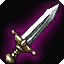

In [5]:
match.participants[0].stats.items[0].image.image

In [6]:
df_blue, df_red = make_match_df(match)

Making call: https://ddragon.leagueoflegends.com/cdn/8.24.1/data/ko_KR/championFull.json
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/8z3q5OfzdnKZS13OniqbZ6MqEhjZCx5PcgDRhBX4dueMqWk
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/USbVQU-Lx8zUlsMBYQAjsmyPW9VjPiP67YVvjMXIXM6C9HE
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/ZksZ_H236f8Mqu-M20K5-YYdw4WuJ_eOyCBYKLc0NB6zYg
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/tMjFy0-1MCbLZx7hBr4ti0uh_zo9VJxY01gQ3JNW59Kplg
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/7FknJQYt59V9Z5FmojrtTUkXDqnYXRJLXOfII1dpLo4VVYk
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/zCpzUfE6dPQiiTSb_u4zHm0wbPQaZNUG_d-PqXpywDx_mw
Making call: https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/NHYTS7UWYKHMgYIbKkxhoX3WGLHXRI2N_6jKhOQZn4t1j_c
Making call: https://kr.api.riot

In [7]:
df_blue

,챔피언,닉네임,티어,KDA,피해량,와드/제거/제어와드,CS,아이템1,아이템2,아이템3,아이템4,아이템5,아이템6,아이템7,픽순
top_lane,우르곳,브라질리언했음,gold III,"2.33, 2/3/5",9754,7/1/1,108,미니언 해체분석기,칠흑의 양날 도끼,부패 물약,빙하의 장막,닌자의 신발,수정 팔 보호구,와드 토템 (장신구),3
jungle,니코,벤젠덴겐,gold IV,"10.0, 4/1/6",7015,8/0/4,20,NaN,충전형 물약,제어 와드,모렐로노미콘,마법 부여: 룬의 메아리,마법사의 신발,와드 토템 (장신구),2
mid_lane,코르키,소중한한명,gold IV,"7.5, 9/2/6",15261,8/1/1,148,도란의 검,삼위일체,마법사의 신발,고속 연사포,단검,NaN,와드 토템 (장신구),1
adc,애쉬,피들장인 최빨대,gold IV,"2.0, 11/7/3",15811,1/1/0,134,몰락한 왕의 검,NaN,광전사의 군화,루난의 허리케인,유령 무희,도란의 검,와드 토템 (장신구),5
support,소나,머스켓,gold II,"4.0, 1/4/15",10747,11/2/3,5,에테르 환영,얼음 송곳니,제어 와드,마법사의 신발,불타는 향로,광휘의 검,예언자의 렌즈,4


Making call: https://ddragon.leagueoflegends.com/cdn/8.24.1/data/ko_KR/map.json
Making call: https://ddragon.leagueoflegends.com/cdn/8.24.1/img/map/map11.png
Making call: https://kr.api.riotgames.com/lol/match/v4/timelines/by-match/3449425180


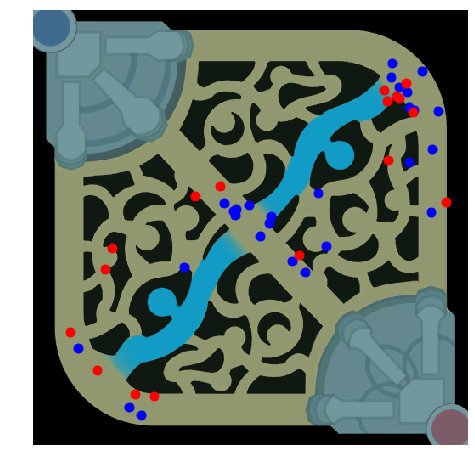

In [8]:
match.kills_heatmap()